<a href="https://colab.research.google.com/github/surya323-ma/data-science/blob/main/Crop_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
# load the dataset
crop = pd.read_csv("Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [10]:
crop['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [11]:
features = crop.columns.to_list()
features.remove('label')
print(features)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


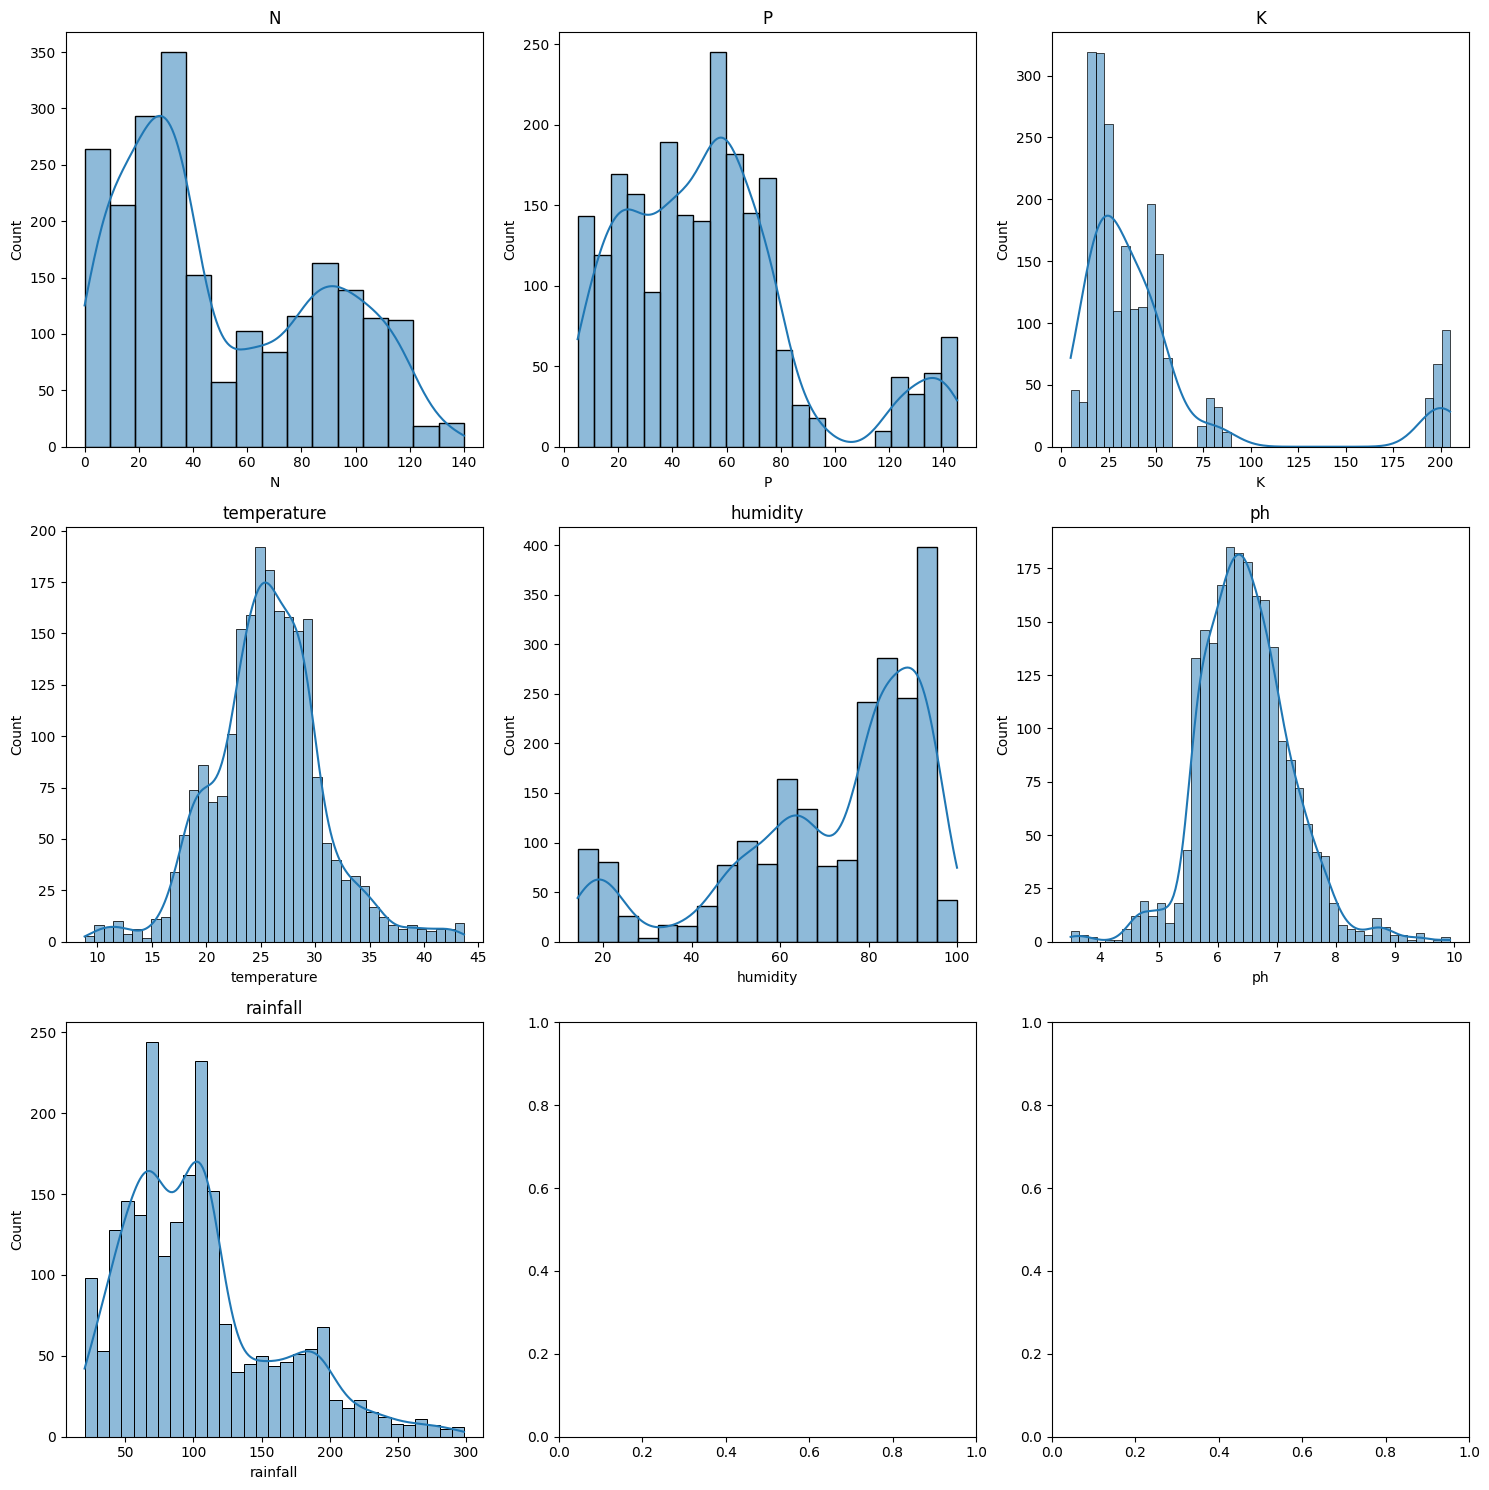

In [12]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(crop[i], ax=subplot, kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()


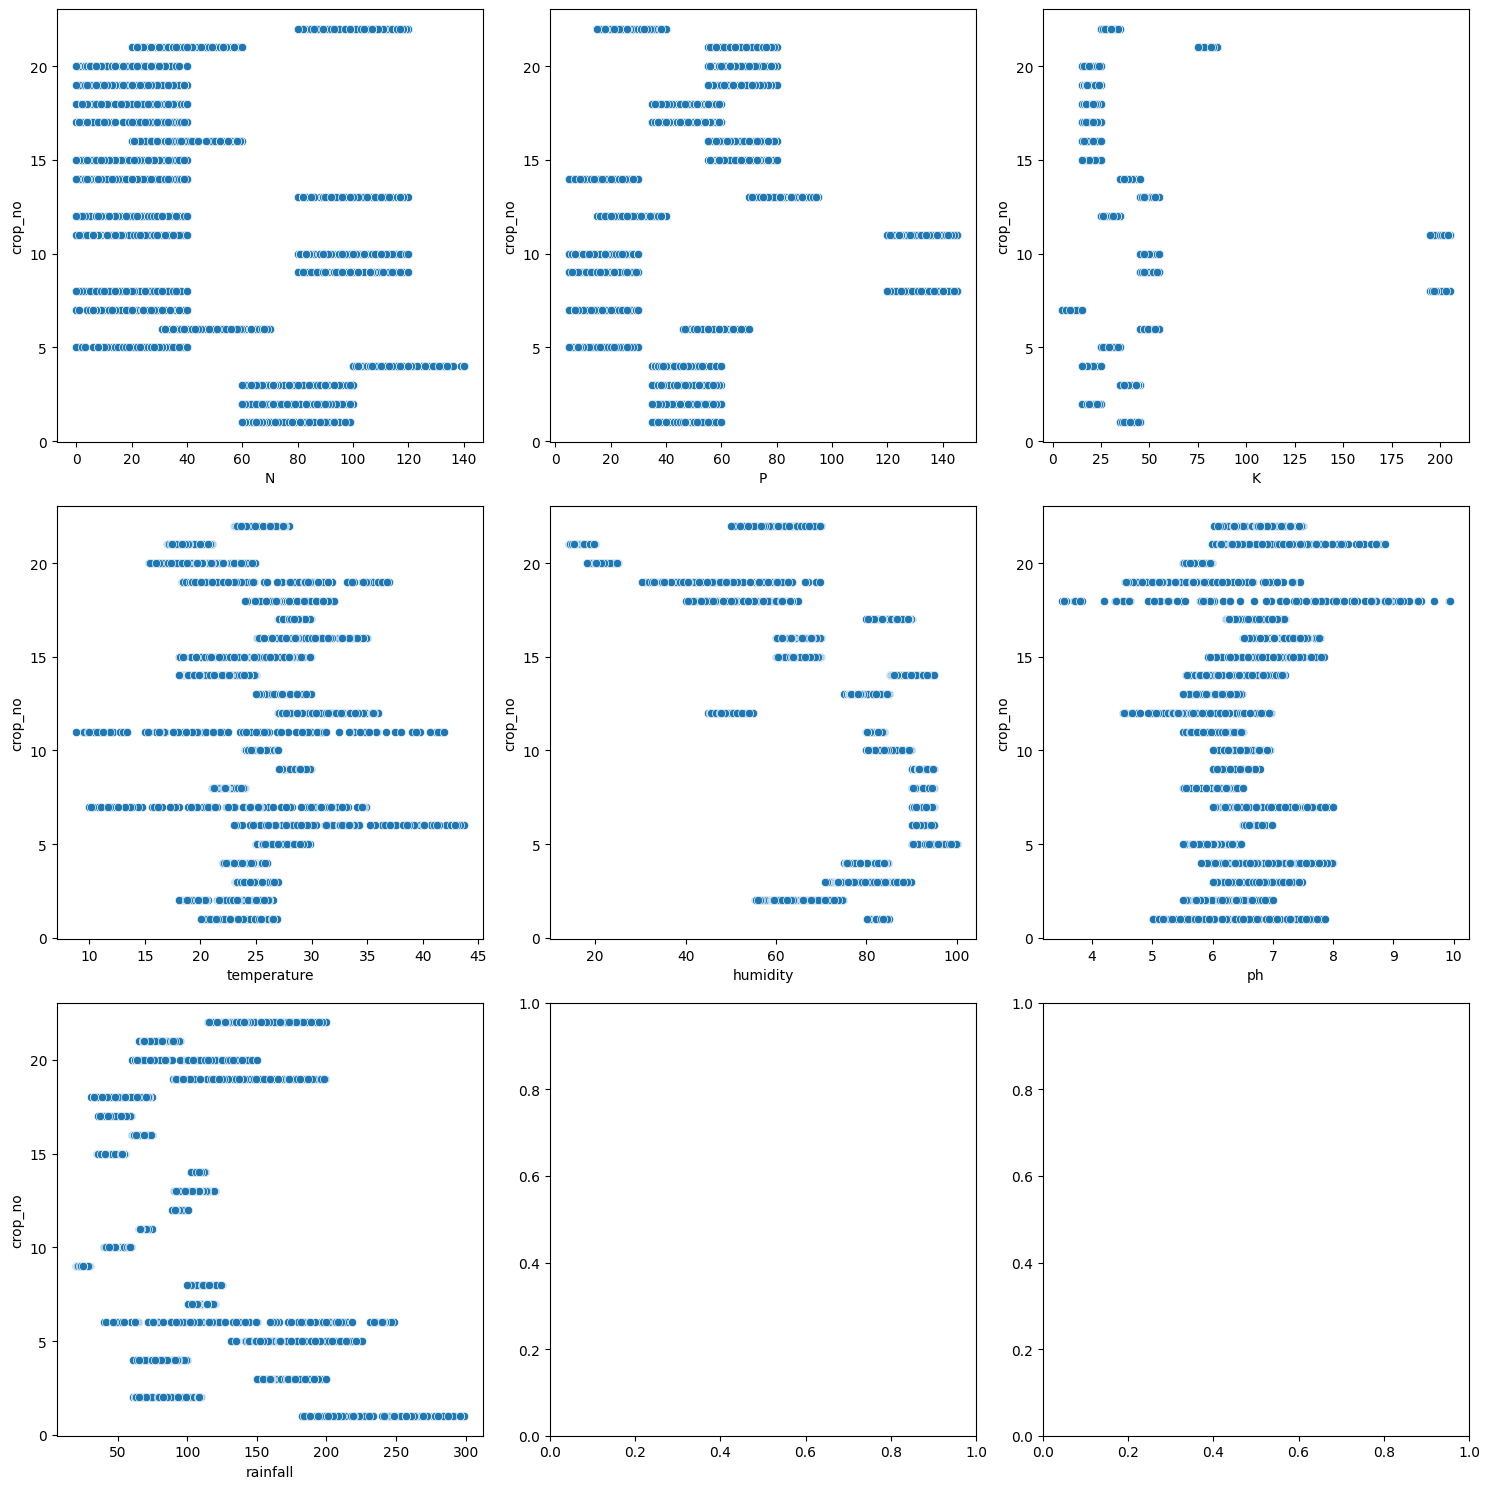

In [38]:
# plot scatter plot of each feature against the target
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='crop_no', data=crop, ax=subplot)
plt.tight_layout()
plt.show()

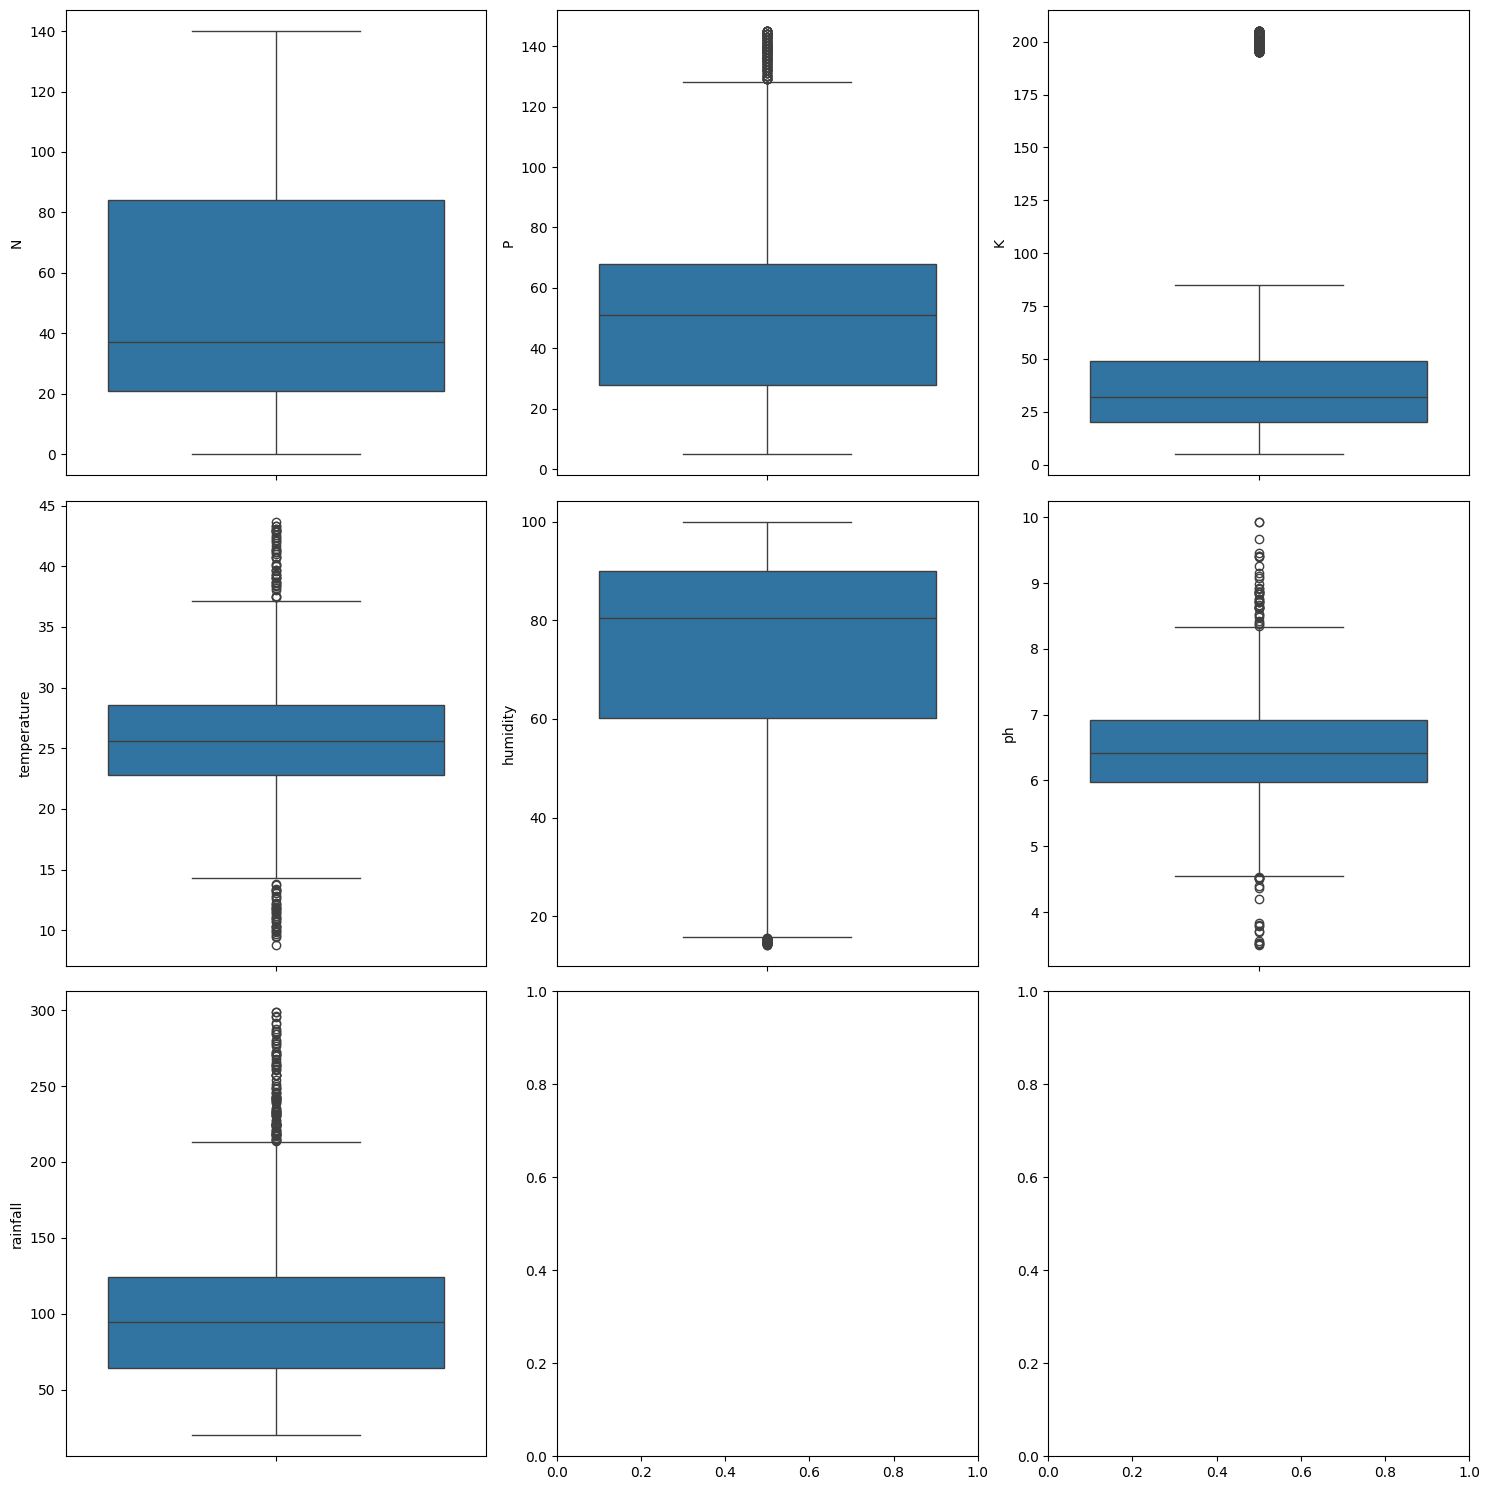

In [14]:
# create box plot for each feature to check for outliers
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.boxplot(crop[i], ax=subplot)
plt.tight_layout()
plt.show()

In [15]:
# check the correlation of the features
numeric_columns = crop.select_dtypes(include=[np.number])
corr = numeric_columns.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


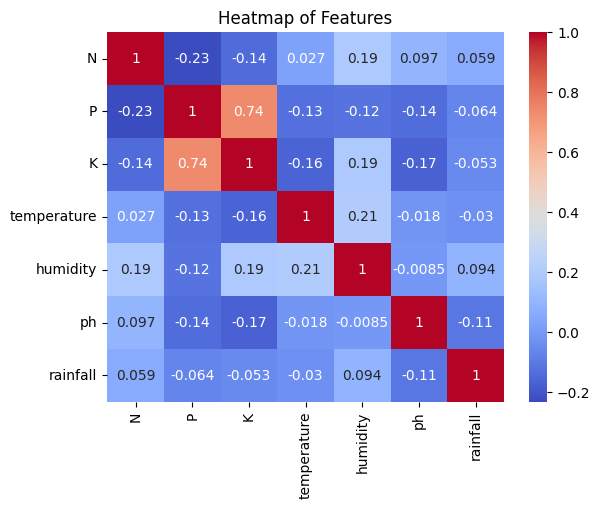

In [16]:
# Visualize the correlation matrix
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')
plt.title("Heatmap of Features")
plt.show()

## Encoding

In [17]:
crop_dict = {
'rice':1,
'maize':2,
'jute':3,
'cotton':4,
'coconut':5,
'papaya':6,
'orange':7,
'apple':8,
'muskmelon':9,
'watermelon':10,
'grapes':11,
'mango':12,
'banana':13,
'pomegranate':14,
'lentil':15,
'blackgram':16,
'mungbean':17,
'mothbeans':18,
'pigeonpeas':19,
'kidneybeans':20,
'chickpea':21,
'coffee': 22,
}

In [18]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [19]:
crop['crop_no'] = crop['label'].map(crop_dict)

In [20]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [21]:
crop['crop_no'].value_counts()

,count
crop_no,
1,100
2,100
21,100
20,100
19,100
18,100
17,100
16,100
15,100


In [22]:
crop.drop('label',axis=1,inplace=True)
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,crop_no
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,22


## Train Test Spilt

In [23]:
x = crop.drop('crop_no',axis=1)
y = crop['crop_no']

print(f"The shape of x is : {x.shape}")
print(f"The shape of y is : {y.shape}")

The shape of x is : (2200, 7)
The shape of y is : (2200,)


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

In [25]:
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (1760, 7)
Shape of y_train: (1760,)
Shape of x_test: (440, 7)
Shape of y_test: (440,)


### Scaling

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Training Models

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [41]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [42]:
y_pred = DT.predict(x_test)
print(f"Accuracy score of Decision Tree Classifier is: {accuracy_score(y_test,y_pred)}")

Accuracy score of Decision Tree Classifier is: 0.9840909090909091


In [30]:
# evaluate the model on train dataset
y_pred_train = DT.predict(x_train)
print(f"Accuracy score of Decision Tree Classifier is: {accuracy_score(y_train,y_pred_train)}")

Accuracy score of Decision Tree Classifier is: 1.0


## Predictive System

In [31]:
def crop_recommend(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    transformed_features = sc.transform(features)
    prediction = DT.predict(transformed_features).reshape(1,-1)
    crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut",
                 6: "Papaya", 7: "Orange", 8: "Apple", 9: "Muskmelon", 10: "Watermelon",
                 11: "Grapes", 12: "Mango", 13: "Banana", 14: "Pomegranate", 15: "Lentil",
                 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",19: "Pigeonpeas",
                 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}
    crop = [crop_dict[i] for i in prediction[0]]


    return f"{crop} is a best crop to be cultivated "

In [43]:
N = 122
P = 49
K = 13
temperature = 29
humidity = 42
ph = 6.1
rainfall = 202

crop_recommend(N,P,K,temperature,humidity,ph,rainfall)

"['Coffee'] is a best crop to be cultivated "

In [44]:
import pickle
pickle.dump(DT, open('crop_model.sav', 'wb'))
pickle.dump(sc, open('crop_scaler.sav', 'wb'))

#### Use a Trained saved model for new predictions

In [45]:
# load the saved model and predict the crop
DT = pickle.load(open('crop_model.sav', 'rb'))
sc = pickle.load(open('crop_scaler.sav', 'rb'))

In [46]:
N = 90
P = 42
K = 43
temperature = 20
humidity = 82
ph = 6.1
rainfall = 202

crop_recommend(N,P,K,temperature,humidity,ph,rainfall)

"['Rice'] is a best crop to be cultivated "